# **Sales Forecasting and Demand Prediction - EDA**

#### The Sales Forecasting and Demand Prediction project aims to build a machine learning model that **predicts future sales** **and demand for products based on historical data**. Accurate forecasting helps businesses optimize inventory management, staffing, and marketing strategies. This project will apply data science techniques, from data collection and analysis to model deployment and monitoring, enabling businesses to make data-driven decisions. 

<-- Table OF Content -->

In [17]:
# Gearing up!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"E:\DEPI\Technical\DEPI\Graduation_Project\Sales-Forecasting-and-Demand-Prediction\Dataset\SuperStoreSales.csv")
sales_df = pd.DataFrame(data)

sales_df.head() # test


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## **1. Data Exploration**

### Retail dataset of a global Superstore for 4 years.

##### This [https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting/data] Dataset Consists of 18 Features that are Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name & Sales. 

### Understanding the Dataset Features
<table style= "width:70%; margin: auto ">
    <tr>
        <th>Feature</th>
        <th>Description</th>
    </tr>
    <tr>
        <td style="font-weight: bolder;">Sales (Target Variable)</td>
        <td>This is the total sales value for a specific order or transaction. It’s a numerical feature representing the monetary value of the products sold, These are the dollar amounts (or other currency) for individual sales transactions..</td>
    </tr>
    <tr>
        <td>Row ID</td>
        <td>A unique identifier for each row in the dataset.</td>
    </tr>
    <tr>
        <td>Order ID</td>
        <td>A unique identifier for each order.</td>
    </tr>
    <tr>
        <td>Order Date</td>
        <td>The date the order was placed. (Useful for time-series analysis.)</td>
    </tr>
    <tr>
        <td>Ship Date</td>
        <td>The date the order was shipped.</td>
    </tr>
    <tr>
        <td>Ship Mode</td>
        <td>indicates the shipping method or speed used to deliver the product to the customer. It’s a categorical variable that describes the type of shipping service (e.g., standard, expedited)..</td>
    </tr>
    <tr>
        <td>Customer ID</td>
        <td>A unique identifier for each customer.</td>
    </tr>
    <tr>
        <td>Customer Name</td>
        <td>The name of the customer.</td>
    </tr>
    <tr>
        <td>Segment</td>
        <td>The customer segment (e.g., Consumer, Corporate, Home Office).</td>
    </tr>
    <tr>
        <td>Country</td>
        <td>The country where the order was placed.</td>
    </tr>
    <tr>
        <td>City</td>
        <td>The city where the order was placed.</td>
    </tr>
    <tr>
        <td>State</td>
        <td>The state where the order was placed.</td>
    </tr>
    <tr>
        <td>Postal Code</td>
        <td>The postal code of the customer’s location.</td>
    </tr>
    <tr>
        <td>Region</td>
        <td>The region (e.g., East, West, South, Central) where the order was placed.</td>
    </tr>
    <tr>
        <td>Product ID</td>
        <td>A unique identifier for each product.</td>
    </tr>
    <tr>
        <td>Category</td>
        <td>The category of the product (e.g., Furniture, Office Supplies, Technology).</td>
    </tr>
    <tr>
        <td>Sub-Category</td>
        <td>The sub-category of the product (e.g., Chairs, Tables, Phones).</td>
    </tr>
    <tr>
        <td>Product Name</td>
        <td>The name of the product.</td>
    </tr>
</table>

### Relevance

1.Time-Based Features:

- `Order Date` and `Ship Date` can be used to create time-based features like:
     Day of the week, month, quarter, or year.

- Time between order and shipment (lead time).

2.Customer and Product Insights:

- `Customer ID`,` Segment`, and `Region` can help analyze customer behavior and preferences.

- `Category` and `Sub-Category` can help identify which products drive sales.

3.External Factors:

- `Ship Mode` can act as a proxy for shipping costs or delivery speed, which might influence sales.

- `Region` and `City` can help analyze geographical trends.

4.Target Variable:

- `Sales` is the value you’ll predict using your forecasting model.

### **1.1 General Feel**

In [3]:
sales_df.shape

(9800, 18)

#### 📌 11 missing values in the postal code column, all of Burlington - Vermont. we can impute using one of there codes, but the postal code column is an identfier that won't contribute to our analysis so no need the column

In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
sales_df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [6]:
sales_df[sales_df["Postal Code"].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [7]:
sales_df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [8]:
sales_df.describe(include="all")

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
count,9800.000000,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9789.000000,9800,9800,9800,9800,9800,9800.000000
unique,NaN,4922,1230,1326,4,793,793,3,1,529,49,NaN,4,1861,3,17,1849,NaN
top,NaN,CA-2018-100111,05/09/2017,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN
freq,NaN,14,38,34,5859,35,35,5101,9800,891,1946,NaN,3140,19,5909,1492,47,NaN
mean,4900.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55273.322403,NaN,NaN,NaN,NaN,NaN,230.769059
std,2829.160653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32041.223413,NaN,NaN,NaN,NaN,NaN,626.651875
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000
25%,2450.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,NaN,NaN,17.248000
50%,4900.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58103.000000,NaN,NaN,NaN,NaN,NaN,54.490000
75%,7350.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,NaN,NaN,210.605000


#### **📌 How does a 1849 Name got 1861 id?** it suggests there are Dups or maybe Product Variants: Different product IDs might represent different variants (e.g., color, size) of the same product name.

In [9]:
print("Unique Product Names:", sales_df["Product Name"].nunique())
print("Unique Product IDs:", sales_df["Product ID"].nunique())

mismatches = sales_df.groupby("Product Name")["Product ID"].nunique()
print(mismatches[mismatches > 1])


Unique Product Names: 1849
Unique Product IDs: 1861
Product Name
#10- 4 1/8" x 9 1/2" Recycled Envelopes           2
Avery Non-Stick Binders                           2
Easy-staple paper                                 8
Eldon Wave Desk Accessories                       2
KI Adjustable-Height Table                        2
Okidata C610n Printer                             2
Peel & Seel Recycled Catalog Envelopes, Brown     2
Prang Drawing Pencil Set                          2
Staple envelope                                   9
Staple holder                                     3
Staple magnet                                     2
Staple remover                                    3
Staple-based wall hangings                        2
Staples                                          10
Staples in misc. colors                           7
Storex Dura Pro Binders                           2
Name: Product ID, dtype: int64


In [10]:
# no duplicates
sales_df.duplicated().sum()

np.int64(0)

#### 📌 The data is only based in the US

In [11]:
sales_df.Country.value_counts()

Country
United States    9800
Name: count, dtype: int64

### **1.2 Data Distrbution**

#### **1.2.1 Sales(Target) Distrbution**

##### 📌This Distrbution Suggests that there are extreme values, also the general feel emphasize this as the mean is `230.76$` while the max is `22638.48$` - Outlier analyisis is Needed

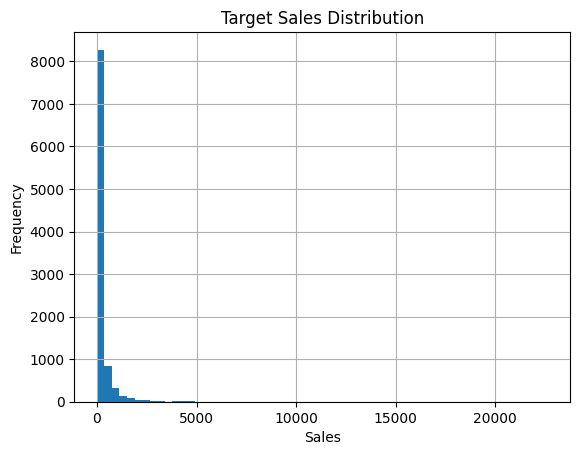

In [18]:
sales_df["Sales"].hist(bins=60)
plt.title("Target Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

#### **1.2.2 Categorical Features**

In [53]:
top_5_cities = sales_df.columns
print(top_5_cities)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')


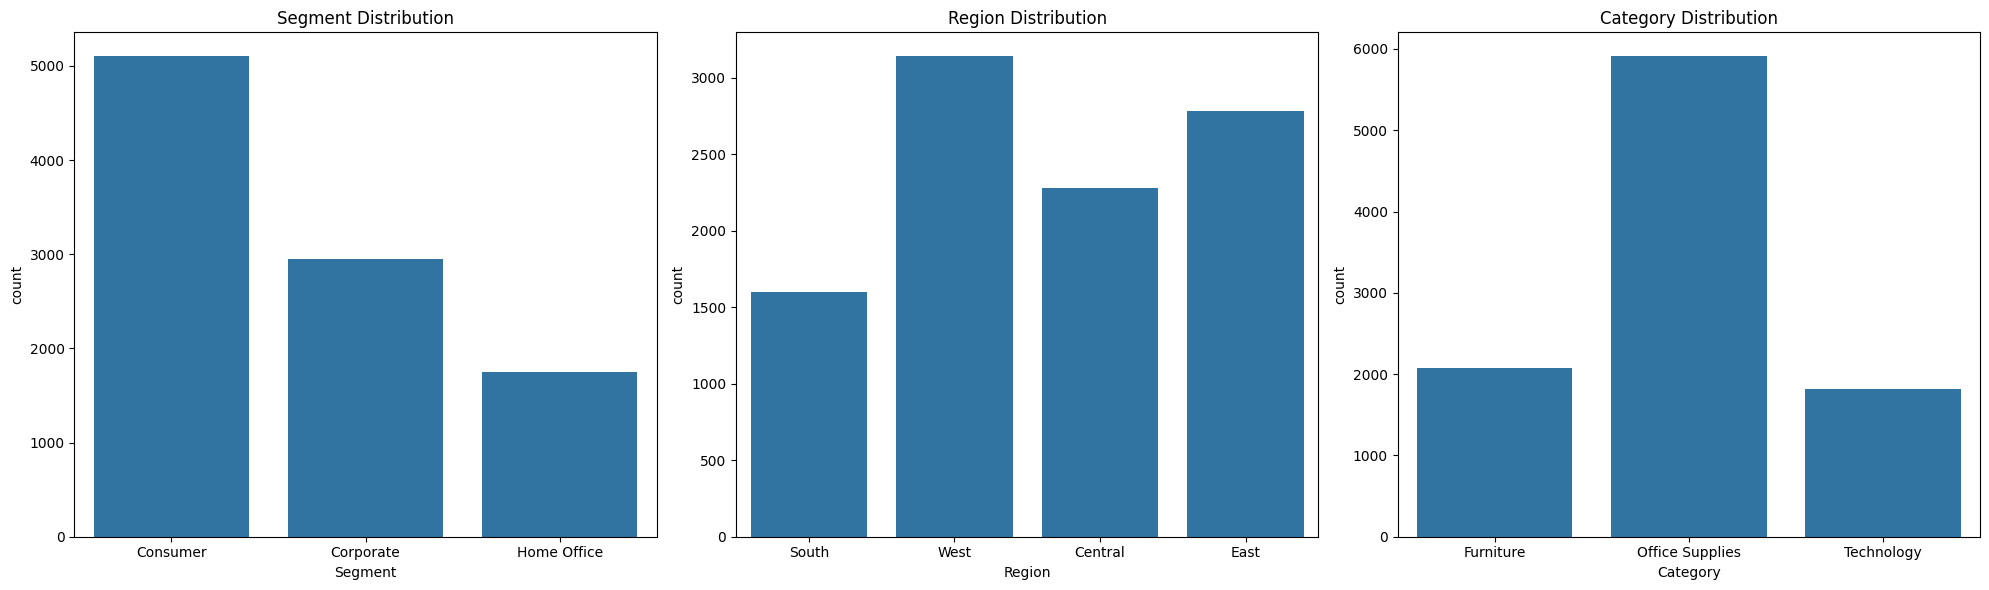

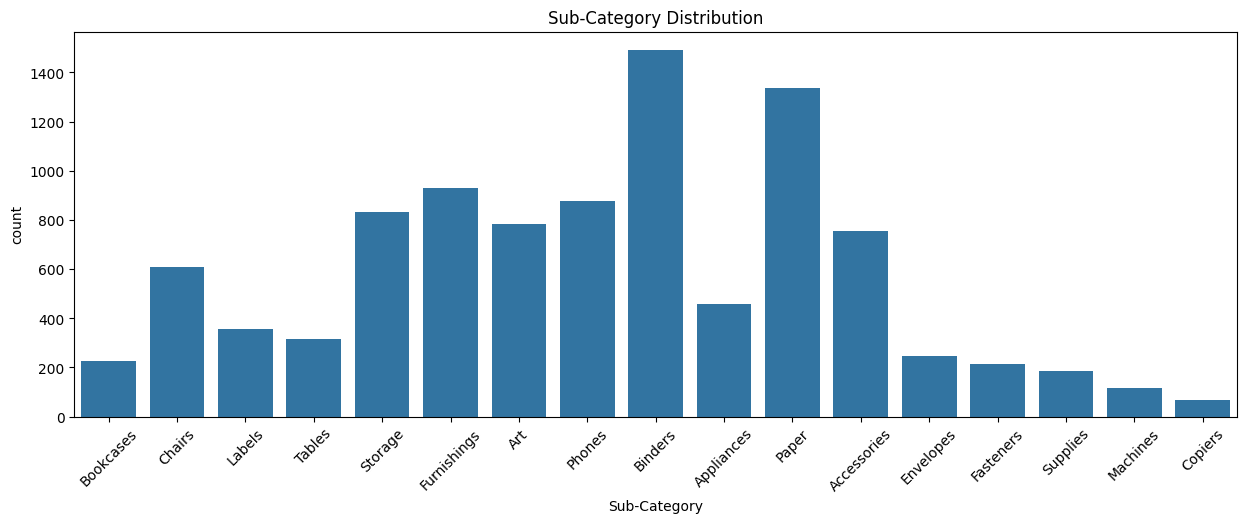

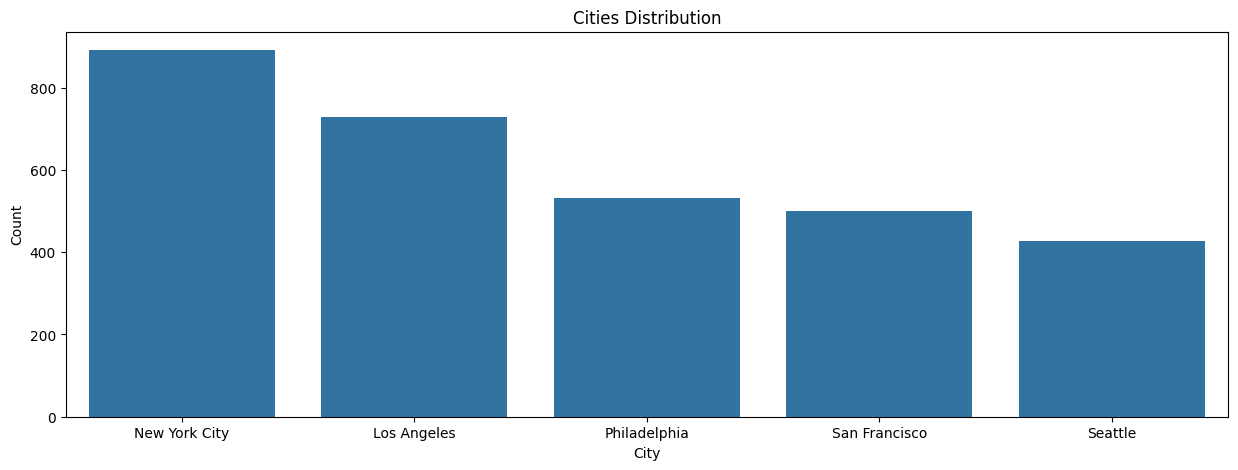

In [52]:
# Plotting categorical data using bar plots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.countplot(ax=axes[0], x='Segment', data=sales_df)
axes[0].set_title('Segment Distribution')

sns.countplot(ax=axes[1], x='Region', data=sales_df)
axes[1].set_title('Region Distribution')

sns.countplot(ax=axes[2], x='Category', data=sales_df)
axes[2].set_title('Category Distribution')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
sns.countplot(x='Sub-Category', data=sales_df)
plt.title('Sub-Category Distribution')
plt.xticks(rotation=45)
plt.show()

# Create a DataFrame with the top 5 cities by count
top_cities = sales_df['City'].value_counts().head(5).reset_index() #?
top_cities.columns = ['City', 'Count']

# Plot the data
plt.figure(figsize=(15, 5))
sns.barplot(x='City', y='Count', data=top_cities)
plt.title('Cities Distribution')
plt.show()


## **2. Data Cleaning**

## **3. Feature Engineering**

## **4. Key Questions To answer**

## **5. Actionable Insights**

## **Summary**